## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.55

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.5948 - accuracy: 0.7855 - val_loss: 2.0215 - val_accuracy: 0.4920
Epoch 50/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.5856 - accuracy: 0.7881 - val_loss: 1.9844 - val_accuracy: 0.4969
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.9942 - accuracy: 0.6518 - val_loss: 1.3360 - val_accuracy: 0.5326
Epoch 48/50
50000/50000 [==============================] - 5s 108us/step - loss: 0.9761 - accuracy: 0.6581 - val_loss: 1.3780 - val_accuracy: 0.5284
Epoch 49/50
50000/50000 [==============================] - 5s 107us/step - loss: 0.9652 - accuracy: 0.6625 - val_loss: 1.5081 - val_accuracy: 0.4880
Epoch 50/50
50000/50000 [==============================] - 5s 108us/step - loss: 0.9545 - accuracy: 0.6686 - val_loss: 1.4310 - val_accuracy: 0.5122
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________

Epoch 45/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.5543 - accuracy: 0.4568 - val_loss: 1.5684 - val_accuracy: 0.4506
Epoch 46/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.5494 - accuracy: 0.4590 - val_loss: 1.5655 - val_accuracy: 0.4481
Epoch 47/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.5449 - accuracy: 0.4613 - val_loss: 1.5660 - val_accuracy: 0.4500
Epoch 48/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.5403 - accuracy: 0.4631 - val_loss: 1.5636 - val_accuracy: 0.4500
Epoch 49/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.5362 - accuracy: 0.4638 - val_loss: 1.5553 - val_accuracy: 0.4574
Epoch 50/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.5317 - accuracy: 0.4658 - val_loss: 1.5510 - val_accuracy: 0.4573
Experiment with LR = 0.000100
Model: "model_1"
___________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.9080 - accuracy: 0.3300 - val_loss: 1.9074 - val_accuracy: 0.3339
Epoch 44/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.9049 - accuracy: 0.3324 - val_loss: 1.9044 - val_accuracy: 0.3356
Epoch 45/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.9019 - accuracy: 0.3335 - val_loss: 1.9014 - val_accuracy: 0.3359
Epoch 46/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.8989 - accuracy: 0.3347 - val_loss: 1.8986 - val_accuracy: 0.3376
Epoch 47/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.8960 - accuracy: 0.3356 - val_loss: 1.8958 - val_accuracy: 0.3381
Epoch 48/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.8932 - accuracy: 0.3373 - val_loss: 1.8930 - val_accuracy: 0.3368
Epoch 49/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.8905 - accuracy: 0.3378

Epoch 41/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.2184 - accuracy: 0.2052 - val_loss: 2.2180 - val_accuracy: 0.2053
Epoch 42/50
50000/50000 [==============================] - 5s 106us/step - loss: 2.2169 - accuracy: 0.2064 - val_loss: 2.2165 - val_accuracy: 0.2065
Epoch 43/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.2154 - accuracy: 0.2070 - val_loss: 2.2150 - val_accuracy: 0.2075
Epoch 44/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.2140 - accuracy: 0.2079 - val_loss: 2.2136 - val_accuracy: 0.2091
Epoch 45/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.2125 - accuracy: 0.2088 - val_loss: 2.2122 - val_accuracy: 0.2096
Epoch 46/50
50000/50000 [==============================] - 5s 106us/step - loss: 2.2111 - accuracy: 0.2094 - val_loss: 2.2107 - val_accuracy: 0.2106
Epoch 47/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.2097 - accuracy: 0.2102

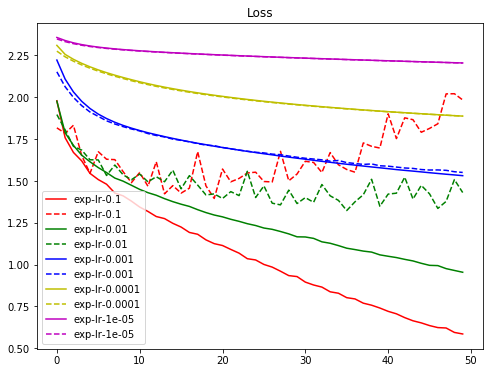

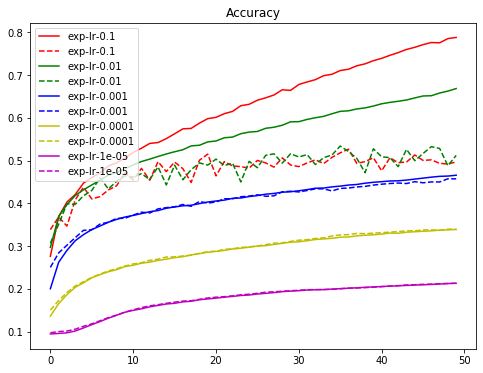

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()